In [1]:
# importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
from nltk import word_tokenize, sent_tokenize,TweetTokenizer,RegexpTokenizer

from nltk.stem import WordNetLemmatizer
from nltk.corpus import  stopwords
import string
from nltk.stem.porter import PorterStemmer

import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('mc_train.csv')
test=pd.read_csv('mc_test.csv')

In [3]:
train.shape , test.shape

((159571, 8), (153164, 2))

In [4]:
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [7]:
train.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
test.describe()

,id,comment_text
count,153164,153164
unique,153164,153164
top,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
freq,1,1


In [9]:
train.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

In [10]:
test.dtypes

id              object
comment_text    object
dtype: object

In [11]:
train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [12]:
test.isnull().sum()

id              0
comment_text    0
dtype: int64

<AxesSubplot:>

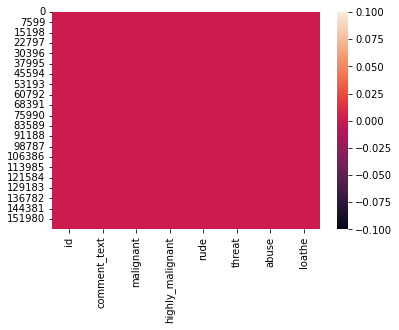

In [13]:
sns.heatmap(train.isnull())

<AxesSubplot:>

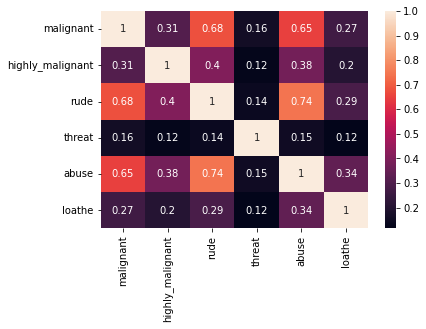

In [14]:
sns.heatmap(train.corr(),annot=True)

In [15]:
train.skew()

malignant            2.745854
highly_malignant     9.851722
rude                 3.992817
threat              18.189001
abuse                4.160540
loathe              10.515923
dtype: float64

In [16]:
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [17]:
train=train.reindex(np.random.permutation(train.index))

In [18]:
train['malignant'].value_counts(normalize=True)

0    0.904156
1    0.095844
Name: malignant, dtype: float64

MALIGNANT
0    0.904156
1    0.095844
Name: malignant, dtype: float64


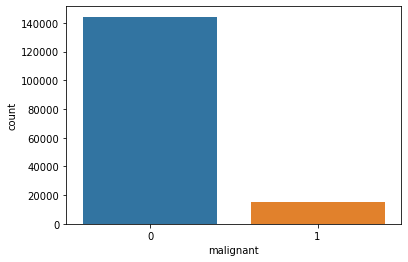

HIGHLY_MALIGNANT
0    0.990004
1    0.009996
Name: highly_malignant, dtype: float64


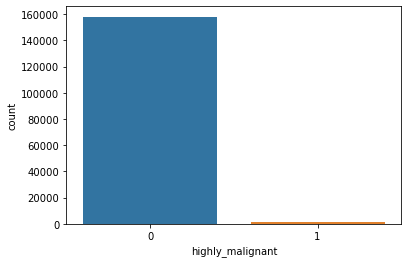

RUDE
0    0.947052
1    0.052948
Name: rude, dtype: float64


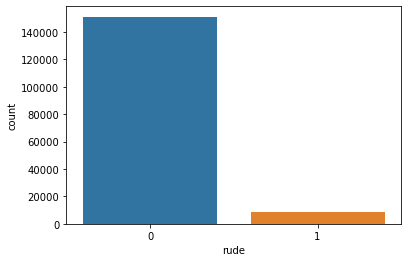

THREAT
0    0.997004
1    0.002996
Name: threat, dtype: float64


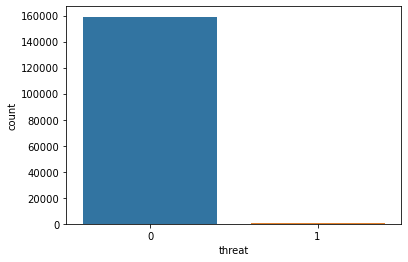

ABUSE
0    0.950636
1    0.049364
Name: abuse, dtype: float64


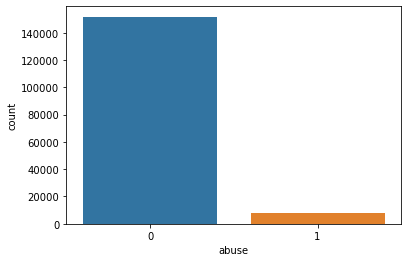

LOATHE
0    0.991195
1    0.008805
Name: loathe, dtype: float64


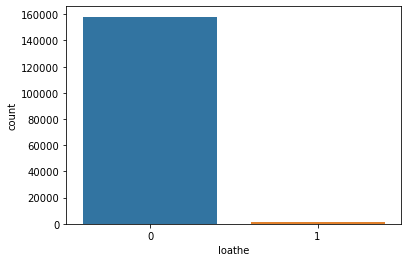

In [19]:
column=['malignant','highly_malignant','rude','threat','abuse','loathe']
for i in column:
    print(i.upper())
    print(train[i].value_counts(normalize=True))
    sns.countplot(train[i])
    plt.xlabel(i)
    plt.show()

In [20]:
column=['malignant','highly_malignant','rude','threat','abuse','loathe']
train['malignant'].sum()

15294

In [21]:
column=['malignant','highly_malignant','rude','threat','abuse','loathe']
train[column].sum().to_frame(name='count').sort_values(by='count', ascending=False)

,count
malignant,15294
rude,8449
abuse,7877
highly_malignant,1595
loathe,1405
threat,478


<AxesSubplot:ylabel='count'>

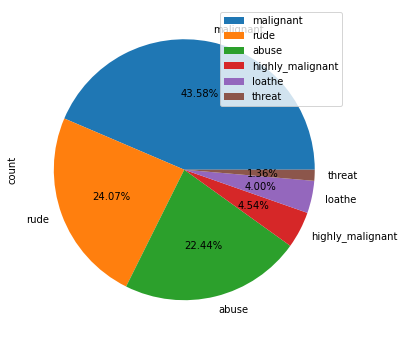

In [23]:
train[column].sum().to_frame(name='count').sort_values(by='count', ascending=False).plot.pie(y='count',autopct='%1.2f%%',figsize=(6,6))

In [24]:
train['comment_text']

78887     He insulted me first[], by calling me a Georgi...
108284    "\nShe has been interviewed by biographers, bo...
103924    "\nAnthony, I think I also mentioned the b-wor...
155723    "\nWell, your political analysis is interestin...
130700    Esoglou tried to 'out' me by addressing me by ...
                                ...                        
46674     Thanks, Patrick. I imagine it'll get deleted i...
107655    2005 Ballon D'or \n\nGerrard did not win it un...
25930     So the bigger picture gets ignored? An abusive...
132741    I will try to clean this page up some,this pag...
57187     "\n\nLaura Marano\nI undid your edit to Laura ...
Name: comment_text, Length: 159571, dtype: object

In [25]:
train['length']=train['comment_text'].str.len()

In [26]:
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
78887,d31f0a533b3ade74,"He insulted me first[], by calling me a Georgi...",0,0,0,0,0,0,289
108284,42d1a5ca2be10fa1,"""\nShe has been interviewed by biographers, bo...",0,0,0,0,0,0,461
103924,2c084f9e3b8d06b9,"""\nAnthony, I think I also mentioned the b-wor...",0,0,0,0,0,0,733
155723,c2ac392cafde6a48,"""\nWell, your political analysis is interestin...",0,0,0,0,0,0,285
130700,bb3fc730bbf4682b,Esoglou tried to 'out' me by addressing me by ...,0,0,0,0,0,0,81


In [27]:
test="My name is moparthi and my email id is moparthi@gmail.com"
import re
t=re.sub('([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)','Email',test)
t

'My name is moparthi and my email id is Email'

In [28]:
train['id'].nunique(),train['id'].count()

(159571, 159571)

In [29]:
column=['malignant','highly_malignant','rude','threat','abuse','loathe']
target_data=train[column]
target_data.head(2)

,malignant,highly_malignant,rude,threat,abuse,loathe
78887,0,0,0,0,0,0
108284,0,0,0,0,0,0


In [30]:
train[column].sum(axis=1)

78887     0
108284    0
103924    0
155723    0
130700    0
         ..
46674     0
107655    0
25930     0
132741    0
57187     0
Length: 159571, dtype: int64

In [31]:
train['target']=train[column].sum(axis=1)

In [32]:
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,target
78887,d31f0a533b3ade74,"He insulted me first[], by calling me a Georgi...",0,0,0,0,0,0,289,0
108284,42d1a5ca2be10fa1,"""\nShe has been interviewed by biographers, bo...",0,0,0,0,0,0,461,0
103924,2c084f9e3b8d06b9,"""\nAnthony, I think I also mentioned the b-wor...",0,0,0,0,0,0,733,0
155723,c2ac392cafde6a48,"""\nWell, your political analysis is interestin...",0,0,0,0,0,0,285,0
130700,bb3fc730bbf4682b,Esoglou tried to 'out' me by addressing me by ...,0,0,0,0,0,0,81,0


In [33]:
train['target'].unique()

array([0, 1, 3, 2, 4, 5, 6], dtype=int64)

In [34]:
train['target'].dtype

dtype('int64')

In [35]:
train['target']=train['target']>0
train['target']=train['target'].astype(int)

In [36]:
train.head(2)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,target
78887,d31f0a533b3ade74,"He insulted me first[], by calling me a Georgi...",0,0,0,0,0,0,289,0
108284,42d1a5ca2be10fa1,"""\nShe has been interviewed by biographers, bo...",0,0,0,0,0,0,461,0


In [37]:
train['target'].value_counts()

0    143346
1     16225
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

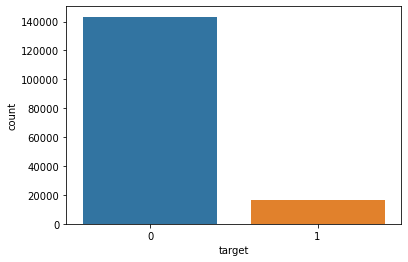

In [38]:
sns.countplot('target',data=train)

In [39]:
stemmer=PorterStemmer()
lemmit=WordNetLemmatizer()
##replace email ids to email,remove stop words and lemmatize

In [40]:
corpus=[]


for i in range(len(train)):
    review=re.sub('([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)','Email',train['comment_text'][i])
    review=re.sub('[^a-zA-Z0-9]',' ',train['comment_text'][i])
    review=review.lower()
    review=review.split()
    
   # review=[lemmit.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]

    review=" ".join(review)
    corpus.append(review)

In [41]:
corpus[0]

'explanation why the edits made under my username hardcore metallica fan were reverted they weren t vandalisms just closure on some gas after i voted at new york dolls fac and please don t remove the template from the talk page since i m retired now 89 205 38 27'

#Test- preprocessing

In [45]:
import nltk
nltk.download('stopwords')
import re

test_data=[]

for i in range(len(test)):
#review=re.sub('([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)','EMAIL',test['comment_text'][i])
# review=re.sub('[^a-zA-Z0-9]',' ',test['comment_text'][i])
    review=review.lower()
    review=review.split()
    
    review=[lemmit.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]
    
    review=" ".join(review)
    test_data.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ndurg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


AttributeError: 'list' object has no attribute 'lower'

In [46]:
test_data[0]

IndexError: list index out of range

In [47]:
##LETS CONVERT WORDS INTO VECTORS

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(max_features=10000)
x=tf.fit_transform(corpus).toarray()

In [49]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [50]:
y=train['target']
y

78887     0
108284    0
103924    0
155723    0
130700    0
         ..
46674     0
107655    0
25930     0
132741    0
57187     0
Name: target, Length: 159571, dtype: int32

In [51]:
x.shape,y.shape

((159571, 10000), (159571,))

In [52]:
random_state=max_final_vocab
max_final_vocab=500000
test_size=x,y,test_size

NameError: name 'max_final_vocab' is not defined

In [53]:
##MultinomialNB

In [54]:
from sklearn.model_selection import train_test_split
x_train,y_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=45)

MemoryError: Unable to allocate 2.38 GiB for an array with shape (31915, 10000) and data type float64

In [ ]:
looks like my system Ram size not enough to run this file